<a href="https://colab.research.google.com/github/okanbuyuktepe/ML-Days/blob/master/ML_Days_W2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [14]:
dataset = {"İsim": ["Mert", "Nilay", "Dogancan", "Omer", "Merve", "Onur"],
          "Soyad": ["Cobanov", "Mertal", "Mavideniz", "Cengiz", "Noyan", "Sahil"],
          "Yas": [24, 22, 24, 23, "bilinmiyor", 23],
          "Sehir": ["Bursa", "Ankara", "Istanbul", np.nan, "Izmir", "Istanbul"],
          "Ulke": ["Turkiye", "Turkiye", "Turkiye", "Turkiye", "Turkiye", "Turkiye"],
          "GANO": [np.nan, np.nan, np.nan, np.nan, 3.90, np.nan]}
          
df = pd.DataFrame(dataset)

In [4]:
df.head()

,İsim,Soyad,Yas,Sehir,Ulke,GANO
0,Mert,Cobanov,24,Bursa,Turkiye,NaN
1,Nilay,Mertal,22,Ankara,Turkiye,NaN
2,Dogancan,Mavideniz,24,Istanbul,Turkiye,NaN
3,Omer,Cengiz,23,NaN,Turkiye,NaN
4,Merve,Noyan,bilinmiyor,Izmir,Turkiye,3.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   İsim    6 non-null      object 
 1   Soyad   6 non-null      object 
 2   Yas     6 non-null      object 
 3   Sehir   5 non-null      object 
 4   Ulke    6 non-null      object 
 5   GANO    1 non-null      float64
dtypes: float64(1), object(5)
memory usage: 416.0+ bytes


In [8]:
df.isna().sum().sum()

6

In [9]:
df.dropna(axis=1, how='any', thresh=3) # colonda herhangi 3 ten fazla nan varsa drop et

,İsim,Soyad,Yas,Sehir,Ulke
0,Mert,Cobanov,24,Bursa,Turkiye
1,Nilay,Mertal,22,Ankara,Turkiye
2,Dogancan,Mavideniz,24,Istanbul,Turkiye
3,Omer,Cengiz,23,NaN,Turkiye
4,Merve,Noyan,bilinmiyor,Izmir,Turkiye
5,Onur,Sahil,23,Istanbul,Turkiye


In [15]:
# df.drop(labels=['GANO', 'Ulke'], axis=1, inplace=True) # inplace = TRUE degisiklikleri df'e uygula
df_2 = df.drop(labels=['GANO', 'Ulke'], axis=1)

In [16]:
df

,İsim,Soyad,Yas,Sehir,Ulke,GANO
0,Mert,Cobanov,24,Bursa,Turkiye,NaN
1,Nilay,Mertal,22,Ankara,Turkiye,NaN
2,Dogancan,Mavideniz,24,Istanbul,Turkiye,NaN
3,Omer,Cengiz,23,NaN,Turkiye,NaN
4,Merve,Noyan,bilinmiyor,Izmir,Turkiye,3.9
5,Onur,Sahil,23,Istanbul,Turkiye,NaN


In [17]:
df_2

,İsim,Soyad,Yas,Sehir
0,Mert,Cobanov,24,Bursa
1,Nilay,Mertal,22,Ankara
2,Dogancan,Mavideniz,24,Istanbul
3,Omer,Cengiz,23,NaN
4,Merve,Noyan,bilinmiyor,Izmir
5,Onur,Sahil,23,Istanbul


In [20]:
df_2['Yas'].replace('bilinmiyor', np.nan, inplace=True) # 'bilinmiyor string'i nan ile degistir

In [21]:
df_2

,İsim,Soyad,Yas,Sehir
0,Mert,Cobanov,24.0,Bursa
1,Nilay,Mertal,22.0,Ankara
2,Dogancan,Mavideniz,24.0,Istanbul
3,Omer,Cengiz,23.0,NaN
4,Merve,Noyan,NaN,Izmir
5,Onur,Sahil,23.0,Istanbul


In [22]:
df_2['Yas'].fillna(value= df_2['Yas'].mean(), inplace =True) # Yas kolonundaki nan degerleri o kolonun ortalamasi ile doldur

In [23]:
df_2

,İsim,Soyad,Yas,Sehir
0,Mert,Cobanov,24.0,Bursa
1,Nilay,Mertal,22.0,Ankara
2,Dogancan,Mavideniz,24.0,Istanbul
3,Omer,Cengiz,23.0,NaN
4,Merve,Noyan,23.2,Izmir
5,Onur,Sahil,23.0,Istanbul


In [25]:
# NAN degerleri doldurmak icin 2. yontem
df_2 = df.drop(labels=['GANO', 'Ulke'], axis=1)
df_2['Yas'].replace('bilinmiyor', np.nan, inplace=True) # 'bilinmiyor string'i nan ile degistir

from sklearn.impute import SimpleImputer

df_2

,İsim,Soyad,Yas,Sehir
0,Mert,Cobanov,24.0,Bursa
1,Nilay,Mertal,22.0,Ankara
2,Dogancan,Mavideniz,24.0,Istanbul
3,Omer,Cengiz,23.0,NaN
4,Merve,Noyan,NaN,Izmir
5,Onur,Sahil,23.0,Istanbul


In [26]:
imp_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [28]:
df_2['Yas'] = imp_freq.fit_transform(df_2[['Yas']])

In [29]:
df_2

,İsim,Soyad,Yas,Sehir
0,Mert,Cobanov,24.0,Bursa
1,Nilay,Mertal,22.0,Ankara
2,Dogancan,Mavideniz,24.0,Istanbul
3,Omer,Cengiz,23.0,NaN
4,Merve,Noyan,23.0,Izmir
5,Onur,Sahil,23.0,Istanbul


#### Enterpolasyon

In [32]:
s = pd.Series([0, 1, np.nan, 3])
print(s)

0    0.0
1    1.0
2    NaN
3    3.0
dtype: float64


In [33]:
s.interpolate()

0    0.0
1    1.0
2    2.0
3    3.0
dtype: float64

In [34]:
from sklearn.impute import KNNImputer

In [35]:
X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
pd.DataFrame(X)

,0,1,2
0,1.0,2,NaN
1,3.0,4,3.0
2,NaN,6,5.0
3,8.0,8,7.0


In [38]:
imputer = KNNImputer(n_neighbors=2, weights='uniform')
X = imputer.fit_transform(X)

In [39]:
pd.DataFrame(X)

,0,1,2
0,1.0,2.0,4.0
1,3.0,4.0,3.0
2,5.5,6.0,5.0
3,8.0,8.0,7.0


In [40]:
df_2

,İsim,Soyad,Yas,Sehir
0,Mert,Cobanov,24.0,Bursa
1,Nilay,Mertal,22.0,Ankara
2,Dogancan,Mavideniz,24.0,Istanbul
3,Omer,Cengiz,23.0,NaN
4,Merve,Noyan,23.0,Izmir
5,Onur,Sahil,23.0,Istanbul


In [41]:
df_2['Sehir'] = df_2['Sehir'].replace(np.nan, 'diger')

In [42]:
df_2

,İsim,Soyad,Yas,Sehir
0,Mert,Cobanov,24.0,Bursa
1,Nilay,Mertal,22.0,Ankara
2,Dogancan,Mavideniz,24.0,Istanbul
3,Omer,Cengiz,23.0,diger
4,Merve,Noyan,23.0,Izmir
5,Onur,Sahil,23.0,Istanbul


#### Standardization

In [43]:
# Standard Scaler
from sklearn.preprocessing import  StandardScaler

In [44]:
df_2 

,İsim,Soyad,Yas,Sehir
0,Mert,Cobanov,24.0,Bursa
1,Nilay,Mertal,22.0,Ankara
2,Dogancan,Mavideniz,24.0,Istanbul
3,Omer,Cengiz,23.0,diger
4,Merve,Noyan,23.0,Izmir
5,Onur,Sahil,23.0,Istanbul


In [45]:
df_ss = df_2.copy()

In [46]:
df_ss['Yas_Scaled'] = StandardScaler().fit_transform(df_ss[['Yas']])

In [50]:
print(df_ss['Yas'].mean(axis=0))
print(df_ss['Yas'].std(axis=0))

23.166666666666668
0.752772652709081


In [53]:
print(df_ss['Yas_Scaled'].mean(axis=0))
print(df_ss['Yas_Scaled'].std(axis=0))

-1.6930901125533637e-15
1.0954451150103321


In [54]:
## Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler

In [55]:
df_mm = df_2.copy()

In [56]:
df_mm['Yas_Scaled'] = MinMaxScaler().fit_transform(df_mm[['Yas']])

In [57]:
df_mm

,İsim,Soyad,Yas,Sehir,Yas_Scaled
0,Mert,Cobanov,24.0,Bursa,1.0
1,Nilay,Mertal,22.0,Ankara,0.0
2,Dogancan,Mavideniz,24.0,Istanbul,1.0
3,Omer,Cengiz,23.0,diger,0.5
4,Merve,Noyan,23.0,Izmir,0.5
5,Onur,Sahil,23.0,Istanbul,0.5


In [58]:
df_ss

,İsim,Soyad,Yas,Sehir,Yas_Scaled
0,Mert,Cobanov,24.0,Bursa,1.212678
1,Nilay,Mertal,22.0,Ankara,-1.697749
2,Dogancan,Mavideniz,24.0,Istanbul,1.212678
3,Omer,Cengiz,23.0,diger,-0.242536
4,Merve,Noyan,23.0,Izmir,-0.242536
5,Onur,Sahil,23.0,Istanbul,-0.242536


#### Encoding
##### label-encoding & one-hot encoding

In [59]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

In [60]:
le = LabelEncoder()

In [61]:
df_le = df_2.copy()

In [62]:
le.fit(df_le['Sehir'])

LabelEncoder()

In [63]:
list(le.classes_)

['Ankara', 'Bursa', 'Istanbul', 'Izmir', 'diger']

In [64]:
df_le['Sehir'] = le.transform(df_le["Sehir"])

In [65]:
df_le

,İsim,Soyad,Yas,Sehir
0,Mert,Cobanov,24.0,1
1,Nilay,Mertal,22.0,0
2,Dogancan,Mavideniz,24.0,2
3,Omer,Cengiz,23.0,4
4,Merve,Noyan,23.0,3
5,Onur,Sahil,23.0,2


In [66]:
le.inverse_transform([2,1,0])

array(['Istanbul', 'Bursa', 'Ankara'], dtype=object)

In [67]:
# OneHotEncoding
pd.get_dummies(df_2['Sehir'])

,Ankara,Bursa,Istanbul,Izmir,diger
0,0,1,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,0,1
4,0,0,0,1,0
5,0,0,1,0,0


#### Quantization and Bins

In [68]:
X = np.array([[ -3., 5., 15 ],
              [  0., 6., 14 ],
              [  6., 3., 11 ]])

In [69]:
from sklearn import preprocessing

In [70]:
preprocessing.KBinsDiscretizer(n_bins=[3,2,2], encode='ordinal').fit_transform(X)

array([[0., 1., 1.],
       [1., 1., 1.],
       [2., 0., 0.]])

In [73]:
# Binerizer
binerizer = preprocessing.Binarizer(threshold=5.1) # esik degerinin altinda 0, uzerinde 1

In [74]:
binerizer.transform(X)

array([[0., 0., 1.],
       [0., 1., 1.],
       [1., 0., 1.]])

#### Feature Selection

In [75]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [85]:
url = 'https://raw.githubusercontent.com/cobanov/ML_Days/master/mushrooms.csv'
data = pd.read_csv(url)

In [86]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [87]:
data.shape

(8124, 23)

In [90]:
X = data.drop(['class'], axis=1)
y = data['class']

In [94]:
X_encoded = pd.get_dummies(X, prefix_sep ='_')

In [95]:
X_encoded

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,...,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [99]:
y_encoded = LabelEncoder().fit_transform(y)

In [101]:
X_scaled = StandardScaler().fit_transform(X_encoded)

In [102]:
X_scaled

array([[-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
         4.59086996, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [ 4.11988487, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       ...,
       [-0.24272523, -0.02219484,  1.2559503 , ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197]])

In [104]:
print(X_scaled.shape)
print(X_encoded.shape)

(8124, 117)
(8124, 117)


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=101)

In [109]:
# 1) without feature selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import time

In [111]:
start = time.process_time()
model = RandomForestClassifier(n_estimators=700).fit(X_train, y_train)
print(time.process_time() - start)

2.873337805000002


In [112]:
preds = model.predict(X_test)

In [131]:
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [114]:
import matplotlib.pyplot as plt

In [120]:
feature_imp = pd.Series(model.feature_importances_, index=X_encoded.columns)

In [121]:

feature_imp

cap-shape_b    0.002706
cap-shape_c    0.000075
cap-shape_f    0.000761
cap-shape_k    0.000433
cap-shape_s    0.000548
                 ...   
habitat_l      0.001270
habitat_m      0.002333
habitat_p      0.003936
habitat_u      0.008087
habitat_w      0.001524
Length: 117, dtype: float64

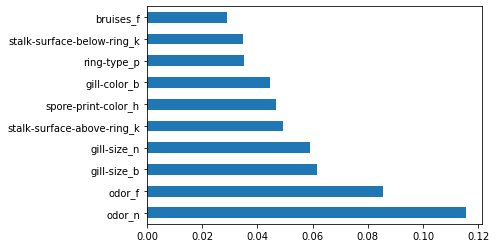

In [122]:
feature_imp.nlargest(10).plot(kind='barh')

In [125]:
# Lets take the first 4 columns according to feature importance
best_feat = feature_imp.nlargest(4).index.to_list()

In [126]:
best_feat

['odor_n', 'odor_f', 'gill-size_b', 'gill-size_n']

In [127]:
X_reduced =  X_encoded[best_feat]

In [129]:
Xr_scaled = StandardScaler().fit_transform(X_reduced)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(Xr_scaled, y, test_size=0.3, random_state=101)

In [133]:
start = time.process_time()
model = RandomForestClassifier(n_estimators=700).fit(X_train, y_train)
print(time.process_time() - start)

1.4180278039999976


In [134]:
rpreds = model.predict(X_test)
print(confusion_matrix(y_test, rpreds))
print(classification_report(y_test, rpreds))

[[1248   26]
 [  53 1111]]
              precision    recall  f1-score   support

           e       0.96      0.98      0.97      1274
           p       0.98      0.95      0.97      1164

    accuracy                           0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438



#### Correlation Matrix

In [135]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [137]:
X = data.drop(['class'], axis=1)
y = data['class']
X_encoded = pd.get_dummies(X, prefix_sep="_")
y_encoded = LabelEncoder().fit_transform(y)
X_encoded["Class"] = y_encoded

In [139]:
X_encoded.iloc[:, -7:].corr()

,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,Class
habitat_g,1.000000,-0.202512,-0.115762,-0.242715,-0.130592,-0.093276,-0.165004
habitat_l,-0.202512,1.000000,-0.065222,-0.136749,-0.073577,-0.052553,0.155150
habitat_m,-0.115762,-0.065222,1.000000,-0.078170,-0.042059,-0.030041,-0.138627
habitat_p,-0.242715,-0.136749,-0.078170,1.000000,-0.088184,-0.062986,0.323346
habitat_u,-0.130592,-0.073577,-0.042059,-0.088184,1.000000,-0.033889,0.112078
habitat_w,-0.093276,-0.052553,-0.030041,-0.062986,-0.033889,1.000000,-0.150087
Class,-0.165004,0.155150,-0.138627,0.323346,0.112078,-0.150087,1.000000


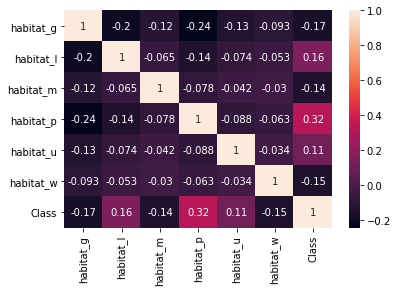

In [140]:
sns.heatmap(X_encoded.iloc[:, -7:].corr(), annot=True)

In [141]:
X_encoded.corr().abs()['Class'].nlargest(10)

Class                         1.000000
odor_n                        0.785557
odor_f                        0.623842
stalk-surface-above-ring_k    0.587658
stalk-surface-below-ring_k    0.573524
ring-type_p                   0.540469
gill-size_n                   0.540024
gill-size_b                   0.540024
gill-color_b                  0.538808
bruises_f                     0.501530
Name: Class, dtype: float64

In [143]:
X_reduced_col_names = X_encoded.corr().abs()["Class"].nlargest(10).index
X_encoded[X_reduced_col_names].corr()

,Class,odor_n,odor_f,stalk-surface-above-ring_k,stalk-surface-below-ring_k,ring-type_p,gill-size_n,gill-size_b,gill-color_b,bruises_f
Class,1.000000,-0.785557,0.623842,0.587658,0.573524,-0.540469,0.540024,-0.540024,0.538808,0.501530
odor_n,-0.785557,1.000000,-0.527269,-0.466499,-0.471920,0.352151,-0.457211,0.457211,-0.455399,-0.285171
odor_f,0.623842,-0.527269,1.000000,0.584189,0.600449,-0.427514,-0.055394,0.055394,0.079360,0.344642
stalk-surface-above-ring_k,0.587658,-0.466499,0.584189,1.000000,0.677074,-0.549484,0.095225,-0.095225,0.237814,0.541494
stalk-surface-below-ring_k,0.573524,-0.471920,0.600449,0.677074,1.000000,-0.536122,0.089569,-0.089569,0.249536,0.530549
ring-type_p,-0.540469,0.352151,-0.427514,-0.549484,-0.536122,1.000000,-0.308466,0.308466,-0.507885,-0.767036
gill-size_n,0.540024,-0.457211,-0.055394,0.095225,0.089569,-0.308466,1.000000,-1.000000,0.776903,0.369596
gill-size_b,-0.540024,0.457211,0.055394,-0.095225,-0.089569,0.308466,-1.000000,1.000000,-0.776903,-0.369596
gill-color_b,0.538808,-0.455399,0.079360,0.237814,0.249536,-0.507885,0.776903,-0.776903,1.000000,0.438292
bruises_f,0.501530,-0.285171,0.344642,0.541494,0.530549,-0.767036,0.369596,-0.369596,0.438292,1.000000


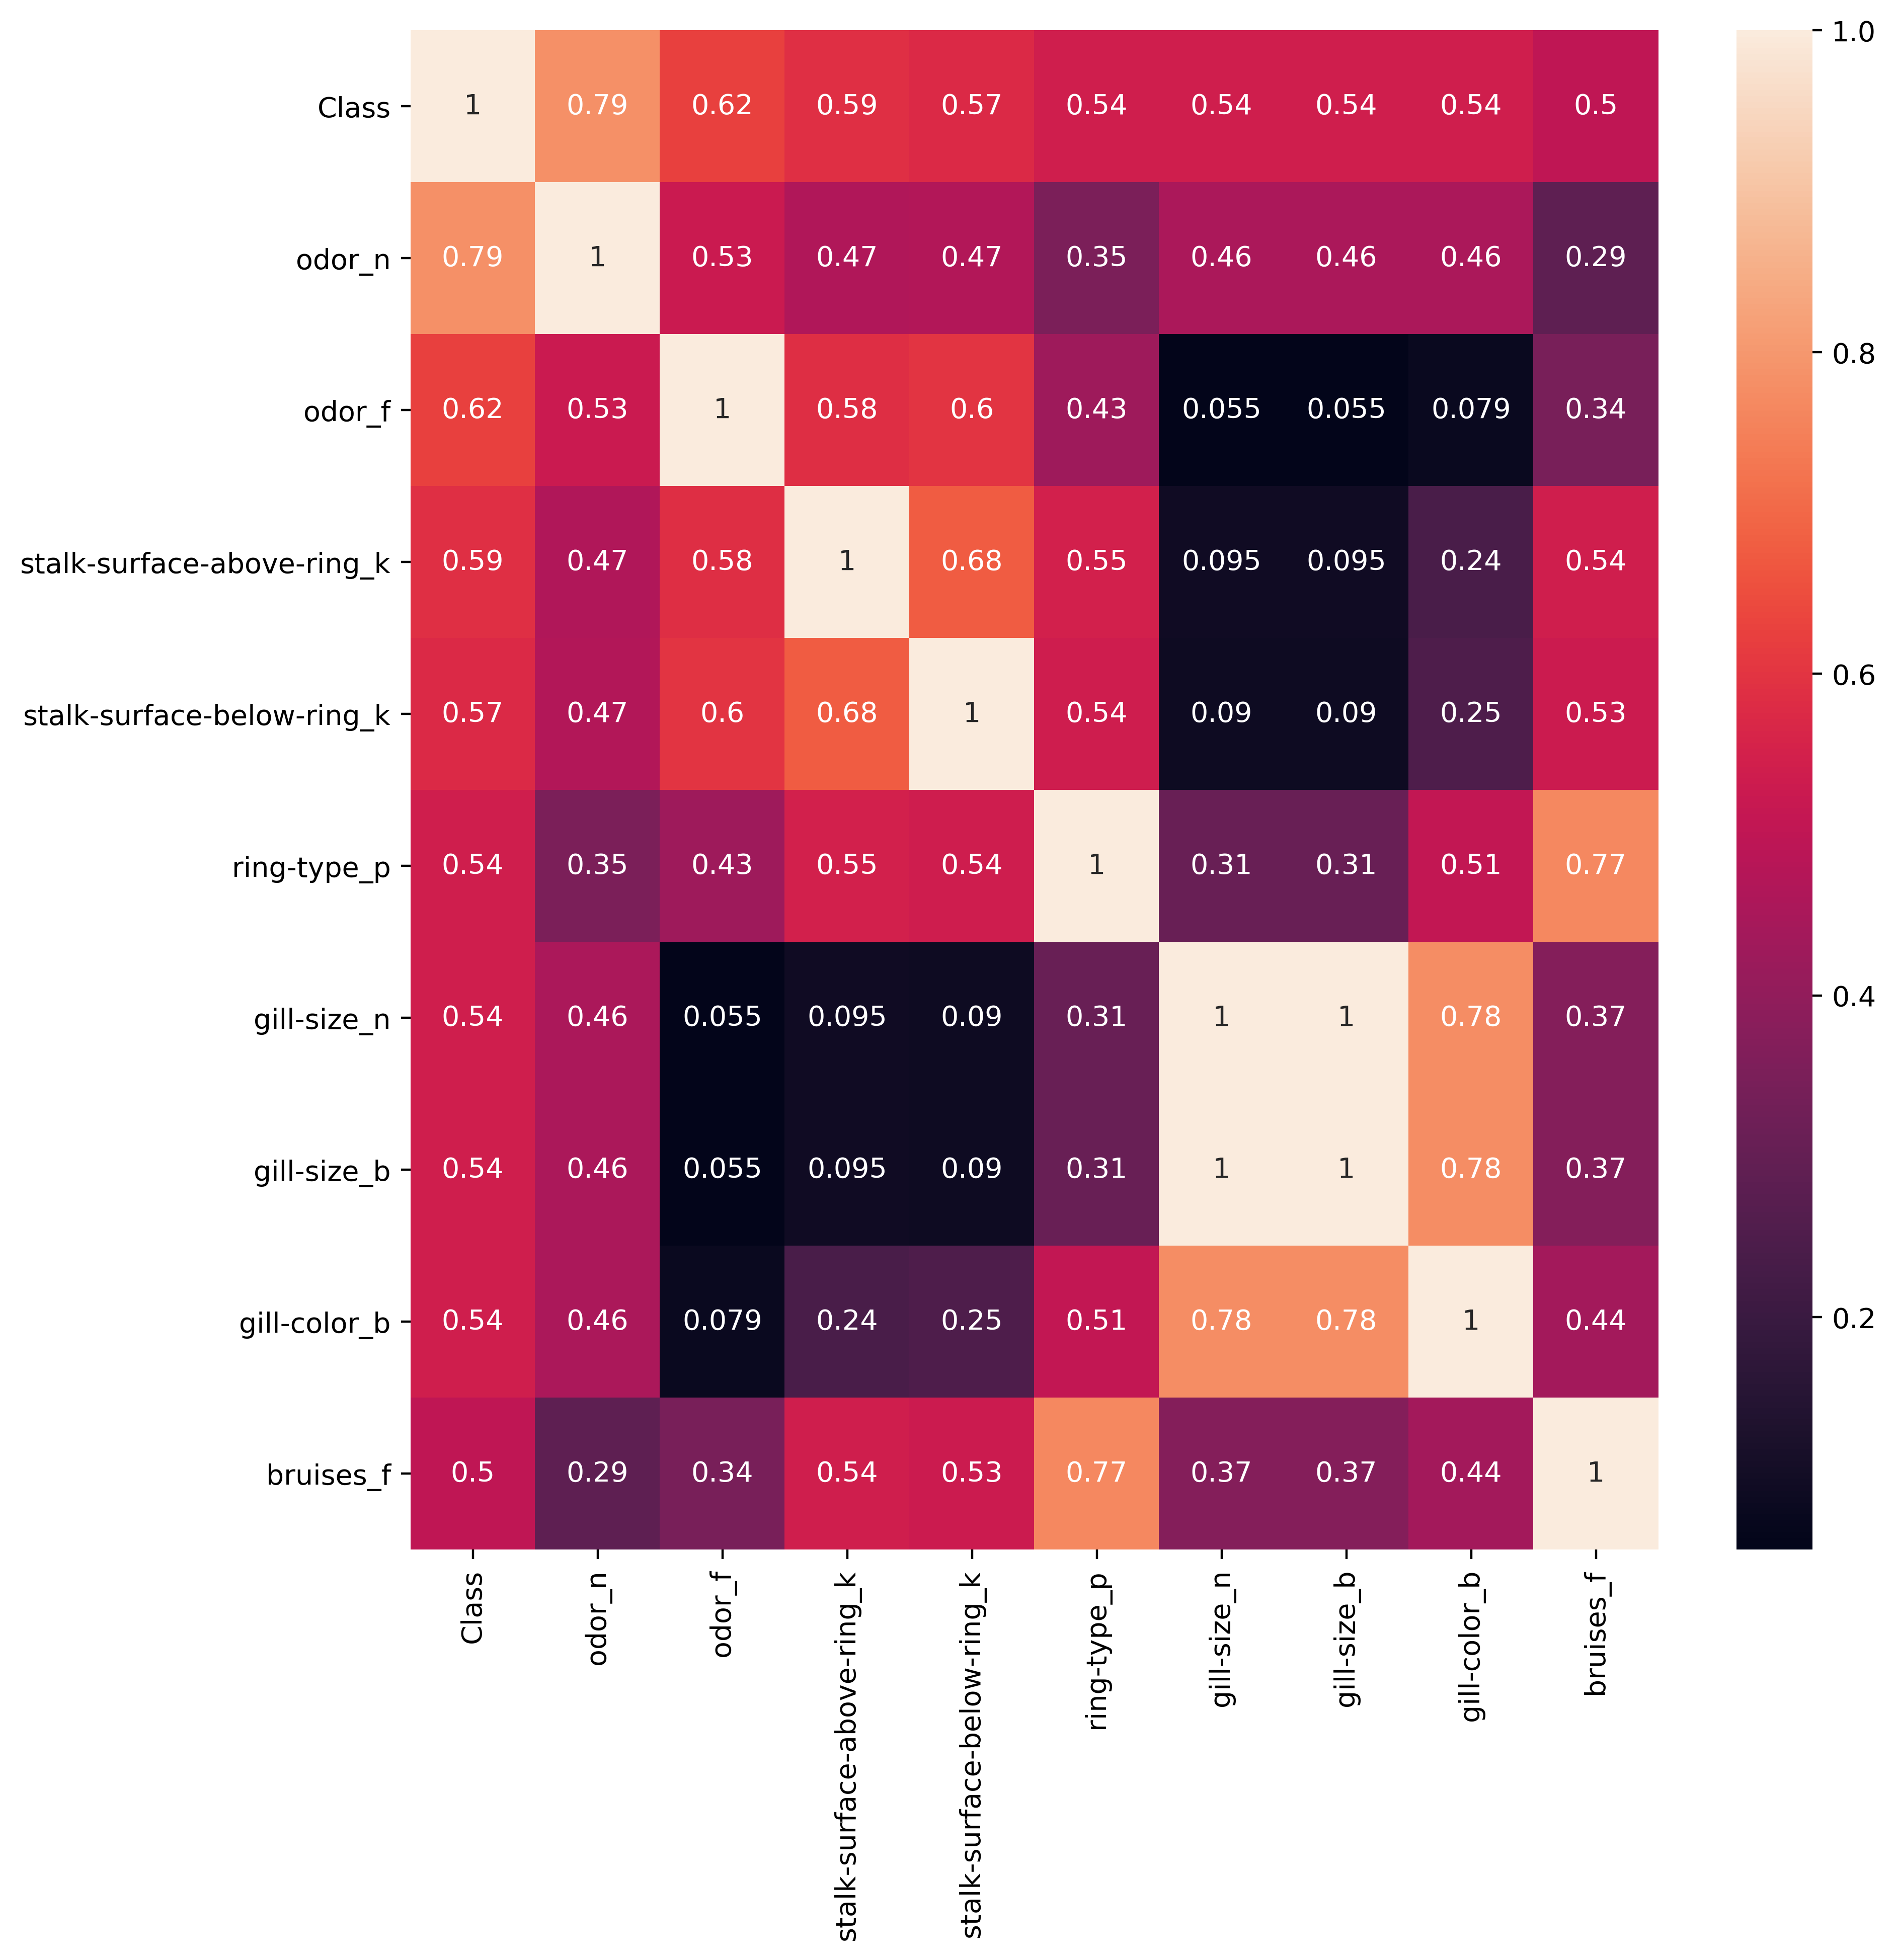

In [144]:
plt.figure(figsize=(10, 10), dpi=400)

sns.heatmap(X_encoded[X_reduced_col_names].corr().abs(), annot=True)